In [1]:
import pandas as pd
from plotnine import *
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


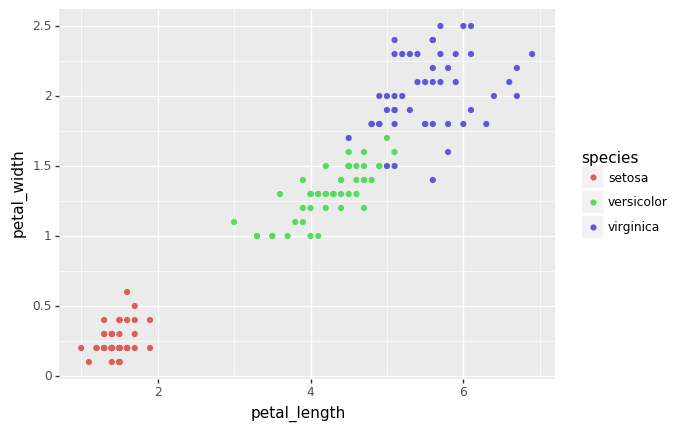

<ggplot: (303226001)>

In [2]:
ggplot(iris,aes(x="petal_length",y="petal_width",color="species"))+geom_point()

In [4]:
x = iris.iloc[:,2:4]
x

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [5]:
from sklearn.cluster import KMeans

In [33]:
km = KMeans(n_clusters = 3, random_state=20)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=20, tol=0.0001, verbose=0)

In [34]:
centers = km.cluster_centers_
centers

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

In [35]:
labels = km.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [36]:
iris["new_species"] = labels

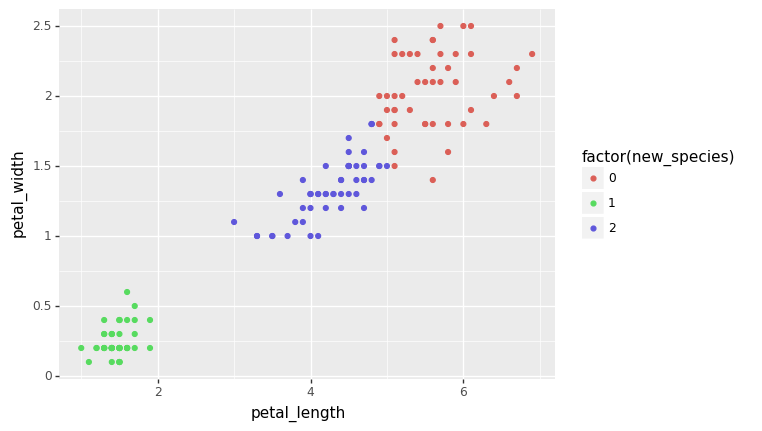

<ggplot: (305852705)>

In [37]:
ggplot(iris,aes(x="petal_length",y="petal_width",color="factor(new_species)"))+geom_point()

In [39]:
sse = {}
for k in range(1,20):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(x)
    sse[k] = km.inertia_

In [41]:
df = pd.DataFrame({"k":list(sse.keys()),"sse":list(sse.values())})

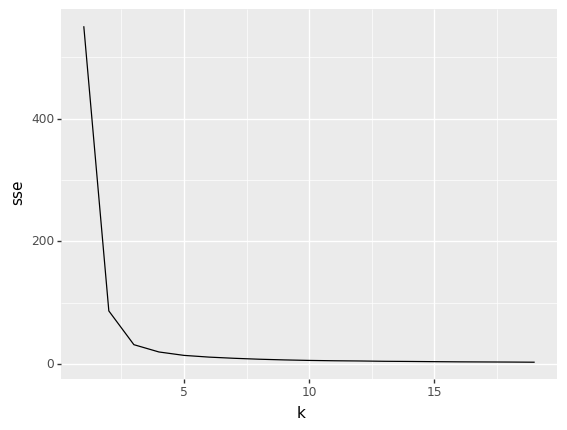

<ggplot: (306355413)>

In [42]:
ggplot(df,aes(x="k",y="sse"))+geom_line()